# Training Classifiers for ESG Ratings

In [2]:
%config InlineBackend.figure_format='retina'
import warnings
from ekorpkit import eKonf

warnings.filterwarnings("ignore")
eKonf.setLogger("WARNING")
print("version:", eKonf.__version__)
print("is notebook?", eKonf.is_notebook())
print("is colab?", eKonf.is_colab())
print("evironment varialbles:")
eKonf.print(eKonf.env().dict())

INFO:ekorpkit.base:IPython version: (6, 9, 0), client: jupyter_client
INFO:ekorpkit.base:Google Colab not detected.


version: 0.1.35+11.gf4a3a1c.dirty
is notebook? True
is colab? False
evironment varialbles:
{'CUDA_DEVICE_ORDER': None,
 'CUDA_VISIBLE_DEVICES': None,
 'EKORPKIT_CONFIG_DIR': '/workspace/projects/ekorpkit-book/config',
 'EKORPKIT_DATA_DIR': None,
 'EKORPKIT_LOG_LEVEL': 'WARNING',
 'EKORPKIT_PROJECT': 'ekorpkit-book',
 'EKORPKIT_WORKSPACE_ROOT': '/workspace',
 'KMP_DUPLICATE_LIB_OK': 'TRUE',
 'NUM_WORKERS': 230}


In [3]:
data_dir = "../data/esg"

## Preparing `esg_polarity_kr` dataset

In [6]:
ds_cfg = eKonf.compose("dataset")
ds_cfg.name = 'esg_polarity_kr'
ds_cfg.data_dir = data_dir
ds = eKonf.instantiate(ds_cfg)
print(ds)

INFO:ekorpkit.datasets.base:Loaded info file: ../data/esg/esg_polarity_kr/info-esg_polarity_kr.yaml
INFO:ekorpkit.io.file:Processing [1] files from ['esg_polarity_kr-train.parquet']
INFO:ekorpkit.io.file:Loading 1 dataframes from ['../data/esg/esg_polarity_kr/esg_polarity_kr-train.parquet']
INFO:ekorpkit.io.file:Loading data from ../data/esg/esg_polarity_kr/esg_polarity_kr-train.parquet
INFO:ekorpkit.info.column:index: index, index of data: index, columns: ['id', 'text', 'labels', 'split'], id: ['id', 'split']
INFO:ekorpkit.info.column:Added a column [split] with value [train]
INFO:ekorpkit.io.file:Processing [1] files from ['esg_polarity_kr-test.parquet']
INFO:ekorpkit.io.file:Loading 1 dataframes from ['../data/esg/esg_polarity_kr/esg_polarity_kr-test.parquet']
INFO:ekorpkit.io.file:Loading data from ../data/esg/esg_polarity_kr/esg_polarity_kr-test.parquet
INFO:ekorpkit.info.column:Added a column [split] with value [test]
INFO:ekorpkit.io.file:Processing [1] files from ['esg_polarity

Dataset : esg_polarity_kr


In [7]:
ds.COLUMN.INFO

{'columns': {'id': ['id', 'split'], 'text': 'text'}, 'datetime': {'columns': None, 'format': None, 'rcParams': None}, 'data': {'id': 'int64', 'text': 'object', 'labels': 'object', 'split': 'object'}}

## Training a polarity classficiation model with `esg_polarity_kr` dataset

In [10]:
overrides=[
    '+model/transformer=classification',
    '+model/transformer/pretrained=ekonelectra-base',
]
model_cfg = eKonf.compose('model/transformer=classification', overrides)
model_cfg.name = "esg_polarity"
model_cfg.dataset = ds_cfg
model_cfg.verbose = False
model_cfg.config.num_train_epochs = 2
model_cfg.config.max_seq_length = 256
model_cfg.config.train_batch_size = 32
model_cfg.config.eval_batch_size = 32
model_cfg.labels = ['positive','neutral','negative']
model_cfg._method_ = ['train']
eKonf.instantiate(model_cfg)

INFO:ekorpkit.base:Calling train
INFO:ekorpkit.datasets.base:Loaded info file: ../data/esg/esg_polarity_kr/info-esg_polarity_kr.yaml
INFO:ekorpkit.io.file:Processing [1] files from ['esg_polarity_kr-train.parquet']
INFO:ekorpkit.io.file:Loading 1 dataframes from ['../data/esg/esg_polarity_kr/esg_polarity_kr-train.parquet']
INFO:ekorpkit.io.file:Loading data from ../data/esg/esg_polarity_kr/esg_polarity_kr-train.parquet
INFO:ekorpkit.info.column:index: index, index of data: index, columns: ['id', 'text', 'labels', 'split'], id: ['id', 'split']
INFO:ekorpkit.info.column:Added a column [split] with value [train]
INFO:ekorpkit.io.file:Processing [1] files from ['esg_polarity_kr-test.parquet']
INFO:ekorpkit.io.file:Loading 1 dataframes from ['../data/esg/esg_polarity_kr/esg_polarity_kr-test.parquet']
INFO:ekorpkit.io.file:Loading data from ../data/esg/esg_polarity_kr/esg_polarity_kr-test.parquet
INFO:ekorpkit.info.column:Added a column [split] with value [test]
INFO:ekorpkit.io.file:Process

Downloading:   0%|          | 0.00/490 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/422M [00:00<?, ?B/s]

Some weights of the model checkpoint at entelecheia/ekonelectra-base-discriminator were not used when initializing ElectraForSequenceClassification: ['discriminator_predictions.dense_prediction.weight', 'discriminator_predictions.dense_prediction.bias', 'discriminator_predictions.dense.bias', 'discriminator_predictions.dense.weight']
- This IS expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at entelecheia/ekonelectra-base-discriminator and are newly initializ

Downloading:   0%|          | 0.00/59.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/223k [00:00<?, ?B/s]

INFO:simpletransformers.classification.classification_model: Converting to features started. Cache is not used.
INFO:simpletransformers.classification.classification_model: Sliding window enabled


  0%|          | 0/8713 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (668 > 512). Running this sequence through the model will result in indexing errors
INFO:simpletransformers.classification.classification_model: 8850 features created from 8713 samples.
/opt/conda/lib/python3.8/site-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch:   0%|          | 0/2 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model: Initializing WandB run for training.
wandb: Currently logged in as: entelecheia. Use `wandb login --relogin` to force relogin


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Running Epoch 0 of 2:   0%|          | 0/277 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model: Converting to features started. Cache is not used.
INFO:simpletransformers.classification.classification_model: Sliding window enabled
INFO:simpletransformers.classification.classification_model: 2179 features created from 2179 samples.
INFO:simpletransformers.classification.classification_model:{'mcc': 0.4795346284159074, 'acc': 0.7131711794401101, 'eval_loss': 0.5993887332902439}


Running Epoch 1 of 2:   0%|          | 0/277 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model: Converting to features started. Cache is not used.
INFO:simpletransformers.classification.classification_model: Sliding window enabled
INFO:simpletransformers.classification.classification_model: 2179 features created from 2179 samples.
INFO:simpletransformers.classification.classification_model:{'mcc': 0.5033993313076224, 'acc': 0.7517209729233594, 'eval_loss': 0.5484368295773215}
INFO:simpletransformers.classification.classification_model: Training of electra model complete. Saved to /workspace/projects/ekorpkit-book/outputs/esg_polarity/ekonelectra-base.
INFO:simpletransformers.classification.classification_model: Converting to features started. Cache is not used.
INFO:simpletransformers.classification.classification_model: Sliding window enabled


  0%|          | 0/2724 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model: 2724 features created from 2724 samples.


Running Evaluation:   0%|          | 0/87 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model: Initializing WandB run for evaluation.


Training loss,█▇▅▃▄▁▃▅▂▂▇
acc,▁█
eval_loss,█▁
global_step,▁▂▂▃▄▄▄▅▆▇▇██
lr,█▇▇▆▅▅▄▃▂▂▁
mcc,▁█
train_loss,█▁
Training loss,0.80837
acc,0.75172
eval_loss,0.54844
global_step,554


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


INFO:simpletransformers.classification.classification_model:{'mcc': 0.488471340741535, 'acc': 0.7466960352422908, 'eval_loss': 0.5608953100511398}


INFO:ekorpkit.base:Calling eval
INFO:ekorpkit.datasets.base:Loaded info file: ../data/esg/esg_polarity_kr/info-esg_polarity_kr.yaml
INFO:ekorpkit.io.file:Processing [1] files from ['esg_polarity_kr-train.parquet']
INFO:ekorpkit.io.file:Loading 1 dataframes from ['../data/esg/esg_polarity_kr/esg_polarity_kr-train.parquet']
INFO:ekorpkit.io.file:Loading data from ../data/esg/esg_polarity_kr/esg_polarity_kr-train.parquet
INFO:ekorpkit.info.column:index: index, index of data: index, columns: ['id', 'text', 'labels', 'split'], id: ['id', 'split']
INFO:ekorpkit.info.column:Added a column [split] with value [train]
INFO:ekorpkit.io.file:Processing [1] files from ['esg_polarity_kr-test.parquet']
INFO:ekorpkit.io.file:Loading 1 dataframes from ['../data/esg/esg_polarity_kr/esg_polarity_kr-test.parquet']
INFO:ekorpkit.io.file:Loading data from ../data/esg/esg_polarity_kr/esg_polarity_kr-test.parquet
INFO:ekorpkit.info.column:Added a column [split] with value [test]
INFO:ekorpkit.io.file:Processi

  0%|          | 0/2724 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model: 2724 features created from 2724 samples.


  0%|          | 0/87 [00:00<?, ?it/s]

INFO:ekorpkit.models.transformer.simple:type of raw_outputs: <class 'list'>
INFO:ekorpkit.models.transformer.simple:raw_output: [-2.369396924972534, 0.5488498210906982, 2.1658785343170166]
INFO:ekorpkit.io.file:Saving dataframe to /workspace/projects/ekorpkit-book/outputs/esg_polarity/ekonelectra-base/esg_polarity_test_predictions.parquet
INFO:ekorpkit.visualize.classification:Confusion matrix: {'display_labels': ['Negative', 'Neutral', 'Positive'], 'matrix_labels': None, 'include_values': True, 'include_percentages': True, 'summary_stats': True, 'rcParams': {'cbar': True, 'cmap': 'Blues'}, '_ax_': {'xlabel': 'Predicted label', 'ylabel': 'Actual label'}}


Accuracy:  0.7466960352422908
Precison:  0.749173268981066
Recall:  0.7466960352422908
F1 Score:  0.7474877595019509
Model Report: 
___________________________________________________
              precision    recall  f1-score   support

    Negative       0.60      0.54      0.57       239
     Neutral       0.82      0.80      0.81      1805
    Positive       0.62      0.67      0.64       680

    accuracy                           0.75      2724
   macro avg       0.68      0.67      0.67      2724
weighted avg       0.75      0.75      0.75      2724



INFO:ekorpkit.visualize.base:Saved figure to /workspace/projects/ekorpkit-book/outputs/esg_polarity/ekonelectra-base/confusion_matrix.png


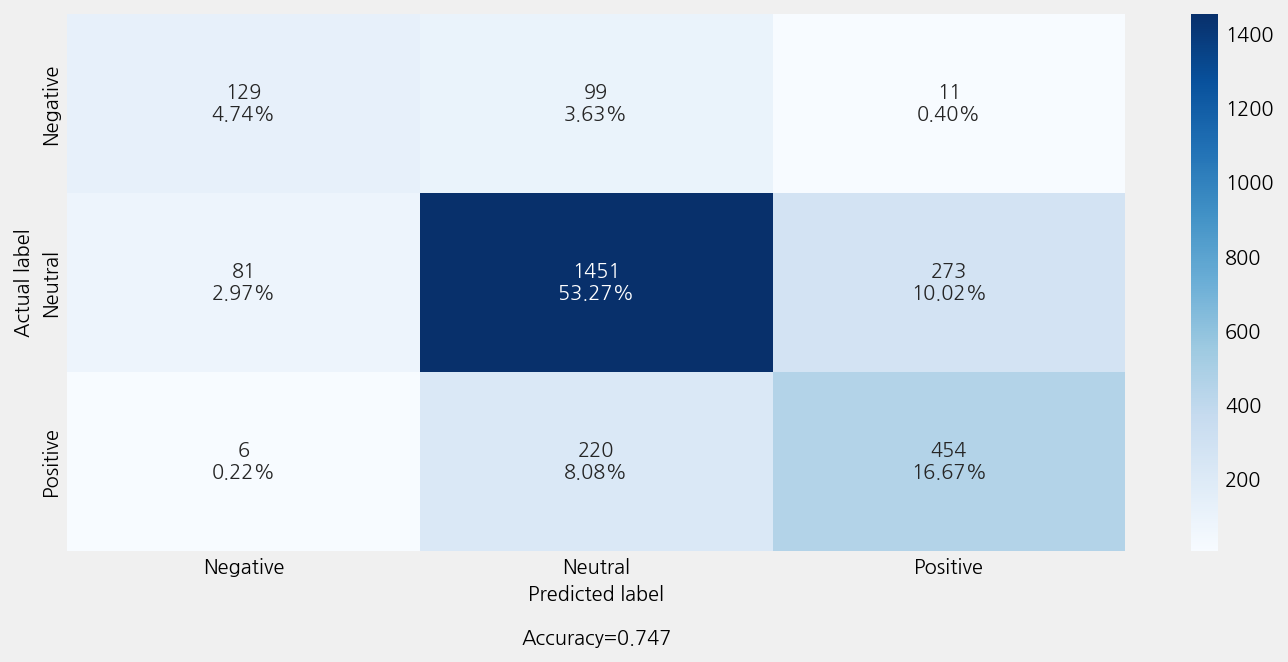

In [12]:
overrides=[
    '+model/transformer=classification',
    '+model/transformer/pretrained=ekonelectra-base',
]
model_cfg = eKonf.compose('model/transformer=classification', overrides)
model_cfg.name = "esg_polarity"
model_cfg.dataset = ds_cfg
model_cfg.verbose = False
model_cfg.config.num_train_epochs = 2
model_cfg.config.max_seq_length = 256
model_cfg.config.train_batch_size = 32
model_cfg.config.eval_batch_size = 32
model_cfg._method_ = ['eval']
eKonf.instantiate(model_cfg)

## Preparing `esg_topics` dataset

In [4]:
ds_cfg = eKonf.compose('dataset')
ds_cfg.name = 'esg_topics'
ds_cfg.data_dir = '/workspace/data/datasets/simple'
ds = eKonf.instantiate(ds_cfg)
labels = list(ds.splits['train'].labels.unique())
print(labels)

INFO:ekorpkit.base:Loaded .env from /workspace/projects/ekorpkit-book/config/.env
INFO:ekorpkit.base:IPython version: (6, 9, 0), client: jupyter_client


['S-기업(공급망)동반성장/상생', 'G-지배구조', 'G-기업윤리/불공정/소송', 'G-주주환원', 'S-소비자', 'E-신재생에너지 발전', 'S-사회공헌', 'S-기술혁신', 'S-인적자본', 'E-환경영향', 'E-기후변화', 'S-산업재해/안전관리', 'G-정보공시', 'E-환경혁신', 'S-노조/노사', 'E-원자력발전']


## Training a category classficiation model with `esg_topics` dataset

In [4]:
overrides=[
    '+model/transformer=classification',
    '+model/transformer/pretrained=ekonelectra-base',
]
model_cfg = eKonf.compose('model/transformer=classification', overrides)
model_cfg.name = "esg_topics"
model_cfg.dataset = ds_cfg
model_cfg.verbose = False
model_cfg.config.num_train_epochs = 2
model_cfg.config.max_seq_length = 256
model_cfg.config.train_batch_size = 32
model_cfg.config.eval_batch_size = 32
model_cfg._method_ = ['train']
eKonf.instantiate(model_cfg)

INFO:ekorpkit.base:Calling train
INFO:ekorpkit.datasets.base:Loaded info file: /workspace/data/datasets/simple/esg_topics/info-esg_topics.yaml
INFO:ekorpkit.io.file:Processing [1] files from ['esg_topics-train.csv']
INFO:ekorpkit.io.file:Loading 1 dataframes from ['/workspace/data/datasets/simple/esg_topics/esg_topics-train.csv']
INFO:ekorpkit.io.file:Loading data from /workspace/data/datasets/simple/esg_topics/esg_topics-train.csv
INFO:ekorpkit.info.column:index: index, index of data: None, columns: ['id', 'text', 'labels', 'class', 'example_id', 'count'], id: ['id']
INFO:ekorpkit.info.column:Adding id [split] to ['id']
INFO:ekorpkit.info.column:Added id [split], now ['id', 'split']
INFO:ekorpkit.info.column:Added a column [split] with value [train]
INFO:ekorpkit.io.file:Processing [1] files from ['esg_topics-test.csv']
INFO:ekorpkit.io.file:Loading 1 dataframes from ['/workspace/data/datasets/simple/esg_topics/esg_topics-test.csv']
INFO:ekorpkit.io.file:Loading data from /workspace/d

  0%|          | 0/10669 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (731 > 512). Running this sequence through the model will result in indexing errors
INFO:simpletransformers.classification.classification_model: 11009 features created from 10669 samples.
/opt/conda/lib/python3.8/site-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch:   0%|          | 0/2 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model: Initializing WandB run for training.
wandb: Currently logged in as: entelecheia. Use `wandb login --relogin` to force relogin


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Running Epoch 0 of 2:   0%|          | 0/345 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model: Converting to features started. Cache is not used.
INFO:simpletransformers.classification.classification_model: Sliding window enabled
INFO:simpletransformers.classification.classification_model: 1186 features created from 1186 samples.
INFO:simpletransformers.classification.classification_model:{'mcc': 0.6002404148131806, 'acc': 0.633220910623946, 'eval_loss': 1.2466306560917904}


Running Epoch 1 of 2:   0%|          | 0/345 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model: Converting to features started. Cache is not used.
INFO:simpletransformers.classification.classification_model: Sliding window enabled
INFO:simpletransformers.classification.classification_model: 1186 features created from 1186 samples.
INFO:simpletransformers.classification.classification_model:{'mcc': 0.6612442719219374, 'acc': 0.6905564924114671, 'eval_loss': 1.0752907442419153}
INFO:simpletransformers.classification.classification_model: Training of electra model complete. Saved to /workspace/projects/ekorpkit-book/outputs/esg_topics/ekonelectra-base.
INFO:simpletransformers.classification.classification_model: Converting to features started. Cache is not used.
INFO:simpletransformers.classification.classification_model: Sliding window enabled


  0%|          | 0/1318 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model: 1318 features created from 1318 samples.


Running Evaluation:   0%|          | 0/43 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model: Initializing WandB run for evaluation.


Training loss,█▅▅▄▄▃▃▄▂▂▂▂▁
acc,▁█
eval_loss,█▁
global_step,▁▂▂▃▃▄▄▄▅▅▆▆▇██
lr,█▇▇▆▆▅▅▄▃▃▂▂▁
mcc,▁█
train_loss,█▁
Training loss,0.79825
acc,0.69056
eval_loss,1.07529
global_step,690


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


INFO:simpletransformers.classification.classification_model:{'mcc': 0.6521812624015145, 'acc': 0.6828528072837633, 'eval_loss': 1.1140903525574262}


INFO:ekorpkit.base:Calling eval
INFO:ekorpkit.datasets.base:Loaded info file: /workspace/data/datasets/simple/esg_topics/info-esg_topics.yaml
INFO:ekorpkit.io.file:Processing [1] files from ['esg_topics-train.csv']
INFO:ekorpkit.io.file:Loading 1 dataframes from ['/workspace/data/datasets/simple/esg_topics/esg_topics-train.csv']
INFO:ekorpkit.io.file:Loading data from /workspace/data/datasets/simple/esg_topics/esg_topics-train.csv
INFO:ekorpkit.info.column:index: index, index of data: None, columns: ['id', 'text', 'labels', 'class', 'example_id', 'count'], id: ['id']
INFO:ekorpkit.info.column:Adding id [split] to ['id']
INFO:ekorpkit.info.column:Added id [split], now ['id', 'split']
INFO:ekorpkit.info.column:Added a column [split] with value [train]
INFO:ekorpkit.io.file:Processing [1] files from ['esg_topics-test.csv']
INFO:ekorpkit.io.file:Loading 1 dataframes from ['/workspace/data/datasets/simple/esg_topics/esg_topics-test.csv']
INFO:ekorpkit.io.file:Loading data from /workspace/da

  0%|          | 0/1318 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (712 > 512). Running this sequence through the model will result in indexing errors
INFO:simpletransformers.classification.classification_model: 1318 features created from 1318 samples.


  0%|          | 0/43 [00:00<?, ?it/s]

INFO:ekorpkit.models.transformer.simple:type of raw_outputs: <class 'list'>
INFO:ekorpkit.models.transformer.simple:raw_output: [1.5525614023208618, -1.328703761100769, -0.8933546543121338, -1.9074918031692505, -0.46544021368026733, -0.9958542585372925, 4.0744194984436035, -0.5456516742706299, 0.5567707419395447, 0.5152987241744995, -0.8728444576263428, 0.33895838260650635, 0.4165045917034149, -1.2813531160354614, 0.3255947530269623, -1.0257333517074585]
INFO:ekorpkit.io.file:Saving dataframe to /workspace/projects/ekorpkit-book/outputs/esg_topics/ekonelectra-base/esg_topics_test_predictions.parquet
INFO:ekorpkit.visualize.classification:Confusion matrix: {'display_labels': ['S-기업(공급망)동반성장/상생', 'G-지배구조', 'G-기업윤리/불공정/소송', 'G-주주환원', 'S-소비자', 'E-신재생에너지 발전', 'S-사회공헌', 'S-기술혁신', 'S-인적자본', 'E-환경영향', 'E-기후변화', 'S-산업재해/안전관리', 'G-정보공시', 'E-환경혁신', 'S-노조/노사', 'E-원자력발전'], 'matrix_labels': None, 'include_values': False, 'include_percentages': False, 'summary_stats': True, 'rcParams': {'cbar': True,

Accuracy:  0.6828528072837633
Precison:  0.678254993620542
Recall:  0.6828528072837633
F1 Score:  0.6631596311220908
Model Report: 
___________________________________________________
                  precision    recall  f1-score   support

          E-기후변화       0.70      0.60      0.65        63
     E-신재생에너지 발전       0.77      0.74      0.75        31
         E-원자력발전       0.91      0.53      0.67        19
          E-환경영향       0.49      0.52      0.51        61
          E-환경혁신       0.48      0.40      0.44        52
   G-기업윤리/불공정/소송       0.60      0.56      0.58        91
          G-정보공시       0.29      0.04      0.07        50
          G-주주환원       0.68      0.79      0.73       162
          G-지배구조       0.76      0.82      0.79       172
          S-기술혁신       0.73      0.80      0.77       158
S-기업(공급망)동반성장/상생       1.00      0.10      0.19        39
         S-노조/노사       0.82      0.87      0.85        70
          S-사회공헌       0.67      0.87      0.76        68
   

INFO:ekorpkit.visualize.base:Saved figure to /workspace/projects/ekorpkit-book/outputs/esg_topics/ekonelectra-base/confusion_matrix.png


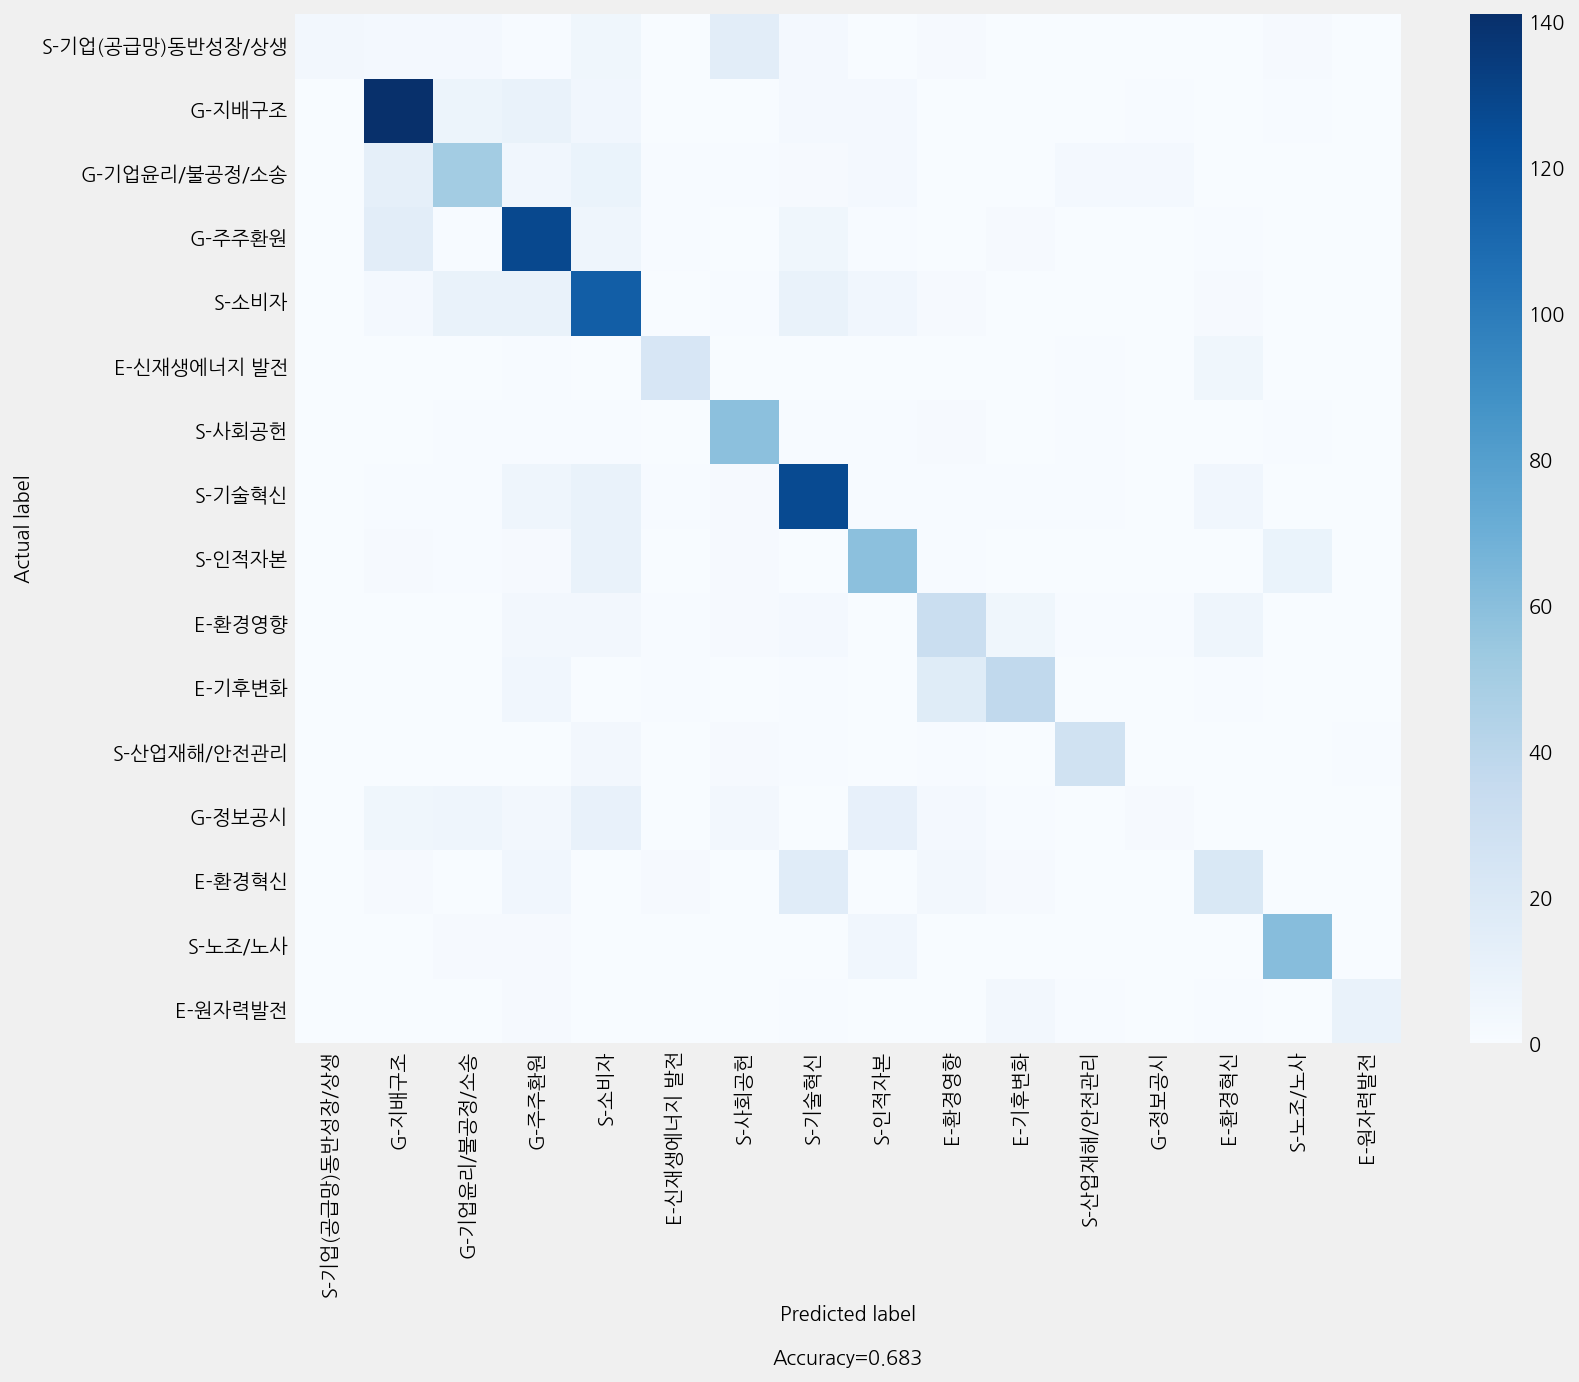

In [8]:
overrides=[
    '+model/transformer=classification',
    '+model/transformer/pretrained=ekonelectra-base',
]
model_cfg = eKonf.compose('model/transformer=classification', overrides)
model_cfg.name = "esg_topics"
model_cfg.dataset = ds_cfg
model_cfg.verbose = False
model_cfg.config.num_train_epochs = 2
model_cfg.config.max_seq_length = 256
model_cfg.config.train_batch_size = 32
model_cfg.config.eval_batch_size = 32
model_cfg._method_ = ['eval']
model_cfg.model.eval.visualize.plot.confusion_matrix.include_values = False
model_cfg.model.eval.visualize.plot.confusion_matrix.include_percentages = False
model_cfg.model.eval.visualize.plot.figure.figsize = (12,10)
eKonf.instantiate(model_cfg)

## Use cleanlab to find potential label errors

In [5]:
overrides=[
    '+model/transformer=classification',
    '+model/transformer/pretrained=ekonelectra-base',
]
model_cfg = eKonf.compose('model/transformer=classification', overrides)
model_cfg.name = "esg_topics"
model_cfg.dataset = ds_cfg
model_cfg.verbose = False
model_cfg.config.num_train_epochs = 2
model_cfg.config.max_seq_length = 256
model_cfg.config.train_batch_size = 32
model_cfg.config.eval_batch_size = 32
model = eKonf.instantiate(model_cfg)

INFO:ekorpkit.base:No method defined to call


In [6]:
cv_preds = model.cross_val_predict(cv=5)
eKonf.save_data(cv_preds, "esg_topics_cv_preds.parquet", data_dir)

Some weights of the model checkpoint at entelecheia/ekonelectra-base-discriminator were not used when initializing ElectraForSequenceClassification: ['discriminator_predictions.dense_prediction.weight', 'discriminator_predictions.dense.weight', 'discriminator_predictions.dense_prediction.bias', 'discriminator_predictions.dense.bias']
- This IS expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at entelecheia/ekonelectra-base-discriminator and are newly initializ

  0%|          | 0/8430 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (3089 > 512). Running this sequence through the model will result in indexing errors


Epoch:   0%|          | 0/2 [00:00<?, ?it/s]

wandb: Currently logged in as: entelecheia. Use `wandb login --relogin` to force relogin


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Running Epoch 0 of 2:   0%|          | 0/272 [00:00<?, ?it/s]

Running Epoch 1 of 2:   0%|          | 0/272 [00:00<?, ?it/s]

  0%|          | 0/2635 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/85 [00:00<?, ?it/s]

Training loss,█▆▄▄▄▂▃▃▂▁
acc,▁█
eval_loss,█▁
global_step,▁▂▂▃▄▄▅▅▆▇▇█
lr,█▇▆▆▅▄▃▃▂▁
mcc,▁█
train_loss,█▁
Training loss,0.91095
acc,0.67742
eval_loss,1.16649
global_step,544


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  0%|          | 0/2635 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (607 > 512). Running this sequence through the model will result in indexing errors


  0%|          | 0/85 [00:00<?, ?it/s]

Some weights of the model checkpoint at entelecheia/ekonelectra-base-discriminator were not used when initializing ElectraForSequenceClassification: ['discriminator_predictions.dense_prediction.weight', 'discriminator_predictions.dense.weight', 'discriminator_predictions.dense_prediction.bias', 'discriminator_predictions.dense.bias']
- This IS expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at entelecheia/ekonelectra-base-discriminator and are newly initializ

  0%|          | 0/8430 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (3089 > 512). Running this sequence through the model will result in indexing errors


Epoch:   0%|          | 0/2 [00:00<?, ?it/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Running Epoch 0 of 2:   0%|          | 0/272 [00:00<?, ?it/s]

Running Epoch 1 of 2:   0%|          | 0/272 [00:00<?, ?it/s]

  0%|          | 0/2635 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/85 [00:00<?, ?it/s]

Training loss,█▆▅▂▂▂▃▁▃▂
acc,▁█
eval_loss,█▁
global_step,▁▂▂▃▄▄▅▅▆▇▇█
lr,█▇▆▆▅▄▃▃▂▁
mcc,▁█
train_loss,█▁
Training loss,1.23329
acc,0.65038
eval_loss,1.21402
global_step,544


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  0%|          | 0/2635 [00:00<?, ?it/s]

  0%|          | 0/85 [00:00<?, ?it/s]

Some weights of the model checkpoint at entelecheia/ekonelectra-base-discriminator were not used when initializing ElectraForSequenceClassification: ['discriminator_predictions.dense_prediction.weight', 'discriminator_predictions.dense.weight', 'discriminator_predictions.dense_prediction.bias', 'discriminator_predictions.dense.bias']
- This IS expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at entelecheia/ekonelectra-base-discriminator and are newly initializ

  0%|          | 0/8430 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (3089 > 512). Running this sequence through the model will result in indexing errors


Epoch:   0%|          | 0/2 [00:00<?, ?it/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Running Epoch 0 of 2:   0%|          | 0/272 [00:00<?, ?it/s]

Running Epoch 1 of 2:   0%|          | 0/272 [00:00<?, ?it/s]

  0%|          | 0/2635 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/86 [00:00<?, ?it/s]

Training loss,█▅▄▄▄▁▁▂▁▃
acc,▁█
eval_loss,█▁
global_step,▁▂▂▃▄▄▅▅▆▇▇█
lr,█▇▆▆▅▄▃▃▂▁
mcc,▁█
train_loss,▁█
Training loss,1.28671
acc,0.65797
eval_loss,1.18823
global_step,544


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  0%|          | 0/2635 [00:00<?, ?it/s]

  0%|          | 0/86 [00:00<?, ?it/s]

Some weights of the model checkpoint at entelecheia/ekonelectra-base-discriminator were not used when initializing ElectraForSequenceClassification: ['discriminator_predictions.dense_prediction.weight', 'discriminator_predictions.dense.weight', 'discriminator_predictions.dense_prediction.bias', 'discriminator_predictions.dense.bias']
- This IS expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at entelecheia/ekonelectra-base-discriminator and are newly initializ

  0%|          | 0/8431 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (573 > 512). Running this sequence through the model will result in indexing errors


Epoch:   0%|          | 0/2 [00:00<?, ?it/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Running Epoch 0 of 2:   0%|          | 0/272 [00:00<?, ?it/s]

Running Epoch 1 of 2:   0%|          | 0/272 [00:00<?, ?it/s]

  0%|          | 0/2634 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/86 [00:00<?, ?it/s]

Training loss,█▆▄▃▃▂▃▁▂▁
acc,▁█
eval_loss,█▁
global_step,▁▂▂▃▄▄▅▅▆▇▇█
lr,█▇▆▆▅▄▃▃▂▁
mcc,▁█
train_loss,█▁
Training loss,1.16132
acc,0.64658
eval_loss,1.1932
global_step,544


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  0%|          | 0/2634 [00:00<?, ?it/s]

  0%|          | 0/86 [00:00<?, ?it/s]

Some weights of the model checkpoint at entelecheia/ekonelectra-base-discriminator were not used when initializing ElectraForSequenceClassification: ['discriminator_predictions.dense_prediction.weight', 'discriminator_predictions.dense.weight', 'discriminator_predictions.dense_prediction.bias', 'discriminator_predictions.dense.bias']
- This IS expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at entelecheia/ekonelectra-base-discriminator and are newly initializ

  0%|          | 0/8431 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (741 > 512). Running this sequence through the model will result in indexing errors


Epoch:   0%|          | 0/2 [00:00<?, ?it/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Running Epoch 0 of 2:   0%|          | 0/272 [00:00<?, ?it/s]

Running Epoch 1 of 2:   0%|          | 0/272 [00:00<?, ?it/s]

  0%|          | 0/2634 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/85 [00:00<?, ?it/s]

Training loss,█▆▄▄▅▃▃▁▂▁
acc,▁█
eval_loss,█▁
global_step,▁▂▂▃▄▄▅▅▆▇▇█
lr,█▇▆▆▅▄▃▃▂▁
mcc,▁█
train_loss,█▁
Training loss,0.69541
acc,0.6537
eval_loss,1.23974
global_step,544


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  0%|          | 0/2634 [00:00<?, ?it/s]

  0%|          | 0/85 [00:00<?, ?it/s]

In [43]:
cv_preds = eKonf.load_data("esg_topics_cv_preds.parquet", data_dir)

In [44]:
len(cv_preds)

13173

In [45]:
labels_map = {label: i for i, label in enumerate(model.labels_list)}
labels_map

{'E-환경혁신': 0,
 'G-정보공시': 1,
 'G-지배구조': 2,
 'G-주주환원': 3,
 'S-기술혁신': 4,
 'S-노조/노사': 5,
 'E-환경영향': 6,
 'S-소비자': 7,
 'S-사회공헌': 8,
 'E-신재생에너지 발전': 9,
 'S-인적자본': 10,
 'G-기업윤리/불공정/소송': 11,
 'S-기업(공급망)동반성장/상생': 12,
 'E-기후변화': 13,
 'E-원자력발전': 14,
 'S-산업재해/안전관리': 15}

In [46]:
import numpy as np
from scipy.special import softmax

cv_preds['preds_len'] = cv_preds.raw_preds.apply(len)
cv_preds = cv_preds[cv_preds.preds_len == len(model.labels_map)].copy().reset_index(drop=True)
raw_full_texts = cv_preds.text.values
full_labels = cv_preds.labels
full_labels = np.vectorize(labels_map.get)(full_labels)
pred_probs = np.array(cv_preds.raw_preds.apply(softmax).tolist())

In [47]:
pred_probs.shape

(12856, 16)

In [33]:
from cleanlab.filter import find_label_issues

ranked_label_issues = find_label_issues(
    labels=full_labels, pred_probs=pred_probs, return_indices_ranked_by="self_confidence"
)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the enviro

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

In [34]:
print(
    f"cleanlab found {len(ranked_label_issues)} potential label errors.\n"
    f"Here are indices of the top 10 most likely errors: \n {ranked_label_issues[:10]}"
)

cleanlab found 2425 potential label errors.
Here are indices of the top 10 most likely errors: 
 [ 1474  1390  1417  4208  1315  1885 10855  5414  3594   865]


In [41]:
eKonf.print(cv_preds.iloc[1390,].to_dict())

{'class': 12,
 'count': 2,
 'example_id': 'e9372cfe-c4e7-403f-94dd-a849c6565285',
 'id': 1556,
 'labels': 'S-사회공헌',
 'pred_labels': 'G-지배구조',
 'pred_probs': 0.9086787547942333,
 'preds_len': 16,
 'raw_preds': [-1.23793625831604,
               0.4596114456653595,
               5.072104454040527,
               1.1136928796768188,
               -0.7624900341033936,
               -0.35901570320129395,
               -1.1392128467559814,
               -0.06763343513011932,
               -1.2178955078125,
               -1.4824095964431763,
               0.6180906295776367,
               1.6064485311508179,
               -0.8751904964447021,
               -1.0037695169448853,
               -1.1419991254806519,
               -1.4866604804992676],
 'split': 'train',
 'text': '현행 기부 의 문제점 및 개선방안\n'
         '먼저 아래 표 3 에서 보듯 대부분 의 기부 가 기업집단 과 관계 되어 있는 재단 에 기부 하고 있는 데 이러한 행태 를 '
         '개선 해야 한다\n'
         '이 재단 들 이 지분 을 보유 하고 있는 경우 에는 상법상 특수 관계 인 에 해당 되기 때문에 순수 한 기부 로 '
         